In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
Data = pd.read_csv('PD_Dataset.csv',sep=';')
print(type(Data))
Data.head(10)

<class 'pandas.core.frame.DataFrame'>


,PD,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,1.16,0.501,0.307,0.043,0.956,0.335
1,0.91,0.550,0.320,0.050,1.065,0.330
2,1.75,0.450,0.230,0.030,0.800,0.250
3,3.24,0.310,0.190,0.030,0.390,0.250
4,1.76,0.450,0.220,0.030,0.790,0.280
5,0.82,0.460,0.220,0.030,1.290,0.320
6,7.10,0.010,-0.030,0.010,0.110,0.250
7,6.25,-0.110,-0.120,0.030,0.150,0.320
8,4.09,0.060,-0.110,0.040,0.410,0.290
9,4.97,0.050,-0.090,0.050,0.250,0.340


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PD       4000 non-null   float64
 1   WC/TA    4000 non-null   float64
 2   RE/TA    4000 non-null   float64
 3   EBIT/TA  4000 non-null   float64
 4   ME/TL    4000 non-null   float64
 5   S/TA     4000 non-null   float64
dtypes: float64(6)
memory usage: 187.6 KB


In [4]:
Data_raw = Data.to_numpy()
X_raw=Data_raw[:,1:len(Data_raw)]
Y_raw=Data_raw[:,0]/100

In [5]:
X_train, X_test, Y_train, Y_test  = train_test_split(X_raw, Y_raw, test_size=0.25, random_state=0)
print(np.size(X_train,axis=0))
print(np.size(X_test,axis=0))
print(np.size(X_train,axis=0)+np.size(X_test,axis=0)==np.size(X_raw,axis=0))
print(np.size(Y_train,axis=0)+np.size(Y_test,axis=0)==np.size(Y_raw,axis=0))

3000
1000
True
True


In [6]:
CARTmodel = DecisionTreeRegressor(max_depth=15)
CARTmodel.fit(X_train,Y_train)


DecisionTreeRegressor(max_depth=15)

In [7]:
Y_cart_outsample=CARTmodel.predict(X_test)
OutSampleMAE=mean_absolute_error(Y_cart_outsample,Y_test)
print(OutSampleMAE)

0.0034851780477540457


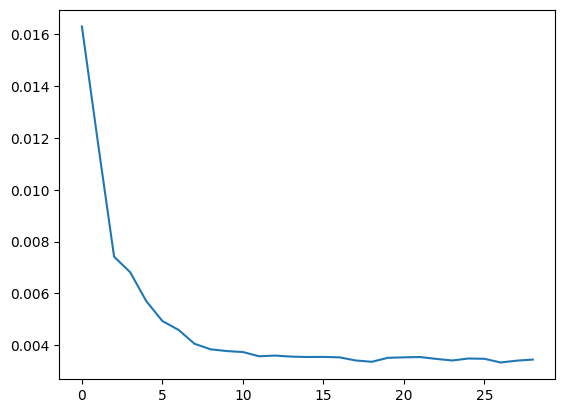

In [8]:
C_range=np.arange(1,30)
OutSampleMAE=np.zeros(len(C_range))
for i in C_range:
  CARTmodel = DecisionTreeRegressor(max_depth=i)
  CARTmodel.fit(X_train,Y_train)
  Y_outsample=CARTmodel.predict(X_test)
  OutSampleMAE[i-1]=mean_absolute_error(Y_outsample,Y_test)
plt.plot(OutSampleMAE)

0.002620158859708879 0.0053077183501322725


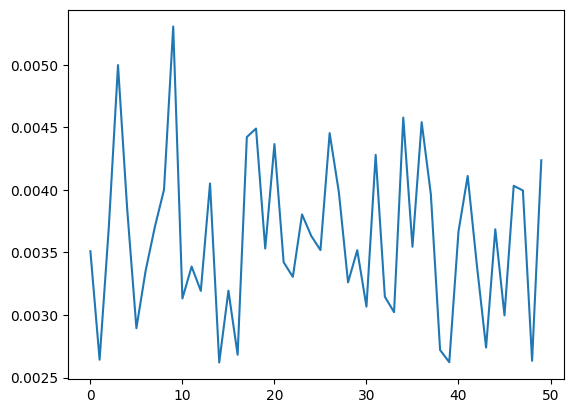

In [9]:
NRepl=50
OutSampleMAE=np.zeros(NRepl)
for i in range(NRepl):
  X_train, X_test, Y_train, Y_test,  = train_test_split(X_raw, Y_raw, test_size=0.25, random_state=i)
  CARTmodel = DecisionTreeRegressor(max_depth=15)
  CARTmodel.fit(X_train,Y_train)
  Y_CART_outsample=CARTmodel.predict(X_test)
  OutSampleMAE[i]=mean_absolute_error(Y_test,Y_CART_outsample)
print(min(OutSampleMAE), max(OutSampleMAE))
plt.plot(OutSampleMAE)